In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_excel("data_with_xray_type.xlsx")

In [4]:
# raw_df[(raw_df.created_on_converted_to_minutes==861) & (raw_df.total_time_elapsed_in_minutes==196)].head()
raw_df

,id,username,status,assigned_to,created_on,created_on_ist,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,...,updated_by,deleted_by,group_id,image_type,shoot_id,rejected_by,ras_count,reporting_extended,reporting_time_limit,xray_type
0,57703,Drone_1,processed,Dr_Ravi_Chavan,2020-08-03 08:54:23,2020-08-03 14:24:23,Monday,August,2020,864,...,Dr_Ravi_Chavan,NaN,45011,xray,0,None,1,0,2020-08-03 10:01:31,Chest PA
1,57608,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:21:04,2020-08-03 12:51:04,Monday,August,2020,771,...,Gayatri_1,NaN,44901,xray,0,None,1,0,2020-08-03 07:57:16,Chest PA
2,57614,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:25:29,2020-08-03 12:55:29,Monday,August,2020,775,...,Gayatri_1,NaN,44907,xray,0,None,1,0,2020-08-03 09:46:14,Chest PA
3,57657,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:40:10,2020-08-03 13:10:10,Monday,August,2020,790,...,Gayatri_1,NaN,44956,xray,0,None,1,0,2020-08-03 08:25:49,Chest PA
4,57714,GMC_1,viewed,Dr_Ravi_Chavan,2020-08-03 08:52:00,2020-08-03 14:22:00,Monday,August,2020,862,...,GMC_1,NaN,45004,xray,0,None,1,0,2020-08-03 10:01:31,Chest PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,6864,GDC_1,viewed,Dr_Nikunj_Kothia,2019-11-23 14:10:45,2019-11-23 19:40:45,Saturday,November,2019,1180,...,GDC_1,NaN,3626,xray,0,None,1,0,NaT,Nasal Bones
40121,9997,GDC_1,viewed,Dr_Paras_Patil,2019-12-28 09:46:42,2019-12-28 15:16:42,Saturday,December,2019,916,...,GDC_1,NaN,5947,xray,0,None,1,0,NaT,Chest
40122,7225,SD_1,viewed,Dr_Paras_Patil,2019-11-27 09:42:18,2019-11-27 15:12:18,Wednesday,November,2019,912,...,SD_1,NaN,3886,xray,0,None,1,0,NaT,Chest
40123,5941,JJT_1,viewed,Dr_Avinash_Mural,2019-11-08 08:53:34,2019-11-08 14:23:34,Friday,November,2019,863,...,JJT_1,NaN,2959,xray,0,None,1,0,NaT,Chest


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40125 entries, 0 to 40124
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               40125 non-null  int64         
 1   username                         40125 non-null  object        
 2   status                           40125 non-null  object        
 3   assigned_to                      40125 non-null  object        
 4   created_on                       40125 non-null  datetime64[ns]
 5   created_on_ist                   40125 non-null  datetime64[ns]
 6   created_on_day                   40125 non-null  object        
 7   created_on_month                 40125 non-null  object        
 8   created_on_year                  40125 non-null  int64         
 9   created_on_converted_to_minutes  40125 non-null  int64         
 10  time_elapsed                     40125 non-null  object   

In [6]:
raw_df.describe()

,id,created_on_year,created_on_converted_to_minutes,time_elapsed_hrs,time_elapsed_minutes,total_time_elapsed_in_minutes,deleted_by,group_id,shoot_id,ras_count,reporting_extended
count,40125.000000,40125.000000,40125.000000,40125.000000,40125.000000,40125.000000,0.0,40125.000000,40125.0,40125.000000,40125.000000
mean,30867.806156,2019.878579,882.009969,1.519601,24.872897,116.048972,NaN,23095.689470,0.0,1.016773,0.000075
std,15547.635383,0.326619,220.149458,7.938619,17.096065,477.172418,NaN,12793.101587,0.0,0.131299,0.008647
min,2357.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,NaN,928.000000,0.0,1.000000,0.000000
25%,17629.000000,2020.000000,740.000000,0.000000,10.000000,19.000000,NaN,11947.000000,0.0,1.000000,0.000000
50%,31121.000000,2020.000000,851.000000,0.000000,22.000000,56.000000,NaN,23188.000000,0.0,1.000000,0.000000
75%,44396.000000,2020.000000,1017.000000,1.000000,39.000000,116.000000,NaN,34184.000000,0.0,1.000000,0.000000
max,57781.000000,2020.000000,1439.000000,678.000000,59.000000,40737.000000,NaN,45070.000000,0.0,4.000000,1.000000


In [7]:
raw_df.select_dtypes(include='int64')

,id,created_on_year,created_on_converted_to_minutes,time_elapsed_hrs,time_elapsed_minutes,total_time_elapsed_in_minutes,group_id,shoot_id,ras_count,reporting_extended
0,57703,2020,864,0,37,37,45011,0,1,0
1,57608,2020,771,0,5,5,44901,0,1,0
2,57614,2020,775,1,52,112,44907,0,1,0
3,57657,2020,790,0,16,16,44956,0,1,0
4,57714,2020,862,0,40,40,45004,0,1,0
...,...,...,...,...,...,...,...,...,...,...
40120,6864,2019,1180,0,59,59,3626,0,1,0
40121,9997,2019,916,1,15,75,5947,0,1,0
40122,7225,2019,912,0,59,59,3886,0,1,0
40123,5941,2019,863,1,51,111,2959,0,1,0


In [8]:
raw_df

,id,username,status,assigned_to,created_on,created_on_ist,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,...,updated_by,deleted_by,group_id,image_type,shoot_id,rejected_by,ras_count,reporting_extended,reporting_time_limit,xray_type
0,57703,Drone_1,processed,Dr_Ravi_Chavan,2020-08-03 08:54:23,2020-08-03 14:24:23,Monday,August,2020,864,...,Dr_Ravi_Chavan,NaN,45011,xray,0,None,1,0,2020-08-03 10:01:31,Chest PA
1,57608,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:21:04,2020-08-03 12:51:04,Monday,August,2020,771,...,Gayatri_1,NaN,44901,xray,0,None,1,0,2020-08-03 07:57:16,Chest PA
2,57614,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:25:29,2020-08-03 12:55:29,Monday,August,2020,775,...,Gayatri_1,NaN,44907,xray,0,None,1,0,2020-08-03 09:46:14,Chest PA
3,57657,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:40:10,2020-08-03 13:10:10,Monday,August,2020,790,...,Gayatri_1,NaN,44956,xray,0,None,1,0,2020-08-03 08:25:49,Chest PA
4,57714,GMC_1,viewed,Dr_Ravi_Chavan,2020-08-03 08:52:00,2020-08-03 14:22:00,Monday,August,2020,862,...,GMC_1,NaN,45004,xray,0,None,1,0,2020-08-03 10:01:31,Chest PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,6864,GDC_1,viewed,Dr_Nikunj_Kothia,2019-11-23 14:10:45,2019-11-23 19:40:45,Saturday,November,2019,1180,...,GDC_1,NaN,3626,xray,0,None,1,0,NaT,Nasal Bones
40121,9997,GDC_1,viewed,Dr_Paras_Patil,2019-12-28 09:46:42,2019-12-28 15:16:42,Saturday,December,2019,916,...,GDC_1,NaN,5947,xray,0,None,1,0,NaT,Chest
40122,7225,SD_1,viewed,Dr_Paras_Patil,2019-11-27 09:42:18,2019-11-27 15:12:18,Wednesday,November,2019,912,...,SD_1,NaN,3886,xray,0,None,1,0,NaT,Chest
40123,5941,JJT_1,viewed,Dr_Avinash_Mural,2019-11-08 08:53:34,2019-11-08 14:23:34,Friday,November,2019,863,...,JJT_1,NaN,2959,xray,0,None,1,0,NaT,Chest


In [9]:
raw_df.columns

Index(['id', 'username', 'status', 'assigned_to', 'created_on',
       'created_on_ist', 'created_on_day', 'created_on_month',
       'created_on_year', 'created_on_converted_to_minutes', 'time_elapsed',
       'time_elapsed_hrs', 'time_elapsed_minutes',
       'total_time_elapsed_in_minutes', 'updated_on', 'updated_on_ist',
       'updated_by', 'deleted_by', 'group_id', 'image_type', 'shoot_id',
       'rejected_by', 'ras_count', 'reporting_extended',
       'reporting_time_limit', 'xray_type'],
      dtype='object')

### select some columns only

In [10]:
filtered_features_df = raw_df.loc[:,['created_on_day','created_on_month','created_on_year','created_on_converted_to_minutes','xray_type','total_time_elapsed_in_minutes']]
filtered_features_df.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40


In [11]:
filtered_features_df.to_csv("Raw_filtered_data.csv",header=True,index=False)

### filter some outlier ie : include only records which are created between 9am - 9pm
### total_time_elapsed_in_minutes should be within 24hrs i.e 1440 mintues

In [12]:
filtered_rows_df = filtered_features_df[(filtered_features_df.created_on_converted_to_minutes>= 540) & (filtered_features_df.created_on_converted_to_minutes<= 1260) & (filtered_features_df.total_time_elapsed_in_minutes <= 1440)]
filtered_rows_df

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40
...,...,...,...,...,...,...
40120,Saturday,November,2019,1180,Nasal Bones,59
40121,Saturday,December,2019,916,Chest,75
40122,Wednesday,November,2019,912,Chest,59
40123,Friday,November,2019,863,Chest,111


<AxesSubplot:>

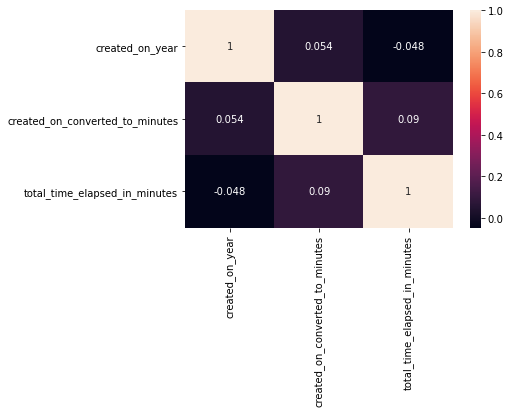

In [13]:
sns.heatmap(filtered_rows_df.corr(),annot=True,fmt='.2g')

<AxesSubplot:xlabel='created_on_converted_to_minutes', ylabel='total_time_elapsed_in_minutes'>

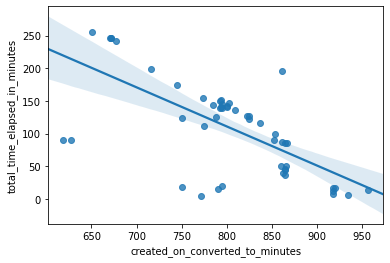

In [14]:
sns.regplot(filtered_rows_df.created_on_converted_to_minutes.head(50),filtered_rows_df.total_time_elapsed_in_minutes.head(50),ci=90, truncate=False)

In [15]:
filtered_rows_df.head(50).sort_values(by='total_time_elapsed_in_minutes')

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
1,Monday,August,2020,771,Chest PA,5
31,Monday,August,2020,934,Chest PA,6
22,Monday,August,2020,918,Chest PA,7
25,Monday,August,2020,918,Chest PA,13
18,Monday,August,2020,956,Chest PA,14
3,Monday,August,2020,790,Chest PA,16
28,Monday,August,2020,918,Chest PA,17
30,Monday,August,2020,920,Chest PA,17
44,Monday,August,2020,750,Chest PA,18
21,Monday,August,2020,795,Chest PA,20


<AxesSubplot:xlabel='created_on_converted_to_minutes'>

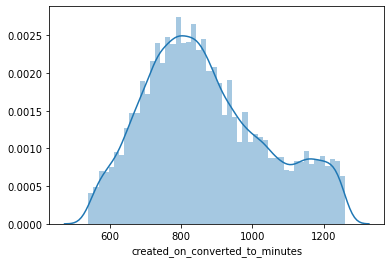

In [16]:
sns.distplot(filtered_rows_df.created_on_converted_to_minutes)

In [17]:
ss = filtered_features_df[(filtered_features_df.created_on_converted_to_minutes>= 540) & (filtered_features_df.created_on_converted_to_minutes<= 1100) & (filtered_features_df.total_time_elapsed_in_minutes <= 1440)]
ss

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40
...,...,...,...,...,...,...
40117,Friday,January,2020,806,Hand Right,6
40121,Saturday,December,2019,916,Chest,75
40122,Wednesday,November,2019,912,Chest,59
40123,Friday,November,2019,863,Chest,111


<AxesSubplot:xlabel='created_on_converted_to_minutes', ylabel='total_time_elapsed_in_minutes'>

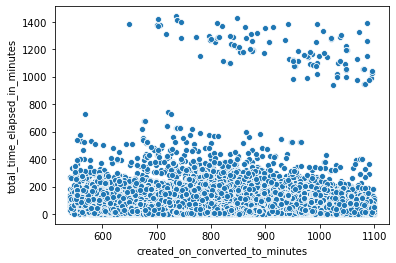

In [18]:
sns.scatterplot(ss.created_on_converted_to_minutes,ss.total_time_elapsed_in_minutes)

### try pycaret on filtered_rows_df

In [19]:
from pycaret.regression import *

In [20]:
filtered_rows_df.drop(columns='created_on_year',inplace=True)

c:\programdata\miniconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
train_data = filtered_rows_df.sample(frac=0.8,random_state=786).reset_index(drop=True)
unseen_data = filtered_rows_df.reset_index().drop(train_data.index).reset_index(drop=True)

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29378 entries, 0 to 29377
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   29378 non-null  object
 1   created_on_month                 29378 non-null  object
 2   created_on_converted_to_minutes  29378 non-null  int64 
 3   xray_type                        29378 non-null  object
 4   total_time_elapsed_in_minutes    29378 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [23]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7345 entries, 0 to 7344
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   index                            7345 non-null   int64 
 1   created_on_day                   7345 non-null   object
 2   created_on_month                 7345 non-null   object
 3   created_on_converted_to_minutes  7345 non-null   int64 
 4   xray_type                        7345 non-null   object
 5   total_time_elapsed_in_minutes    7345 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 344.4+ KB


In [24]:
base_setup = setup(data=train_data,target='total_time_elapsed_in_minutes')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,7008
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(29378, 5)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Light Gradient Boosting Machine,59.8763,12525.0417,111.7336,0.1792,1.3133,4.2047,0.2446
1,CatBoost Regressor,60.0022,12573.5089,111.9759,0.1751,1.3163,4.2745,6.1499
2,Extreme Gradient Boosting,59.7886,13088.9938,114.1718,0.1428,1.3053,4.1685,3.6410
3,Gradient Boosting Regressor,63.7441,13294.3241,115.1238,0.1292,1.3702,4.6493,3.9823
4,Random Forest,54.9414,13368.5087,115.4271,0.1223,1.2074,3.4032,8.1730
5,Bayesian Ridge,66.6330,14411.9135,119.8187,0.0580,1.3996,4.7326,0.4776
6,Ridge Regression,66.8657,14467.9262,120.0565,0.0542,1.4004,4.7264,0.0492
7,TheilSen Regressor,64.4517,14513.5840,120.2298,0.0517,1.3737,4.4729,16.4129
8,Linear Regression,66.9094,14521.4412,120.2888,0.0503,1.4009,4.7260,0.2736
9,Random Sample Consensus,64.4509,14594.0650,120.5604,0.0465,1.3594,4.1830,13.7270


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7008, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Try with bins on cleaned data : filetered_rows_df

In [22]:
filtered_rows_df

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40
...,...,...,...,...,...,...
40120,Saturday,November,2019,1180,Nasal Bones,59
40121,Saturday,December,2019,916,Chest,75
40122,Wednesday,November,2019,912,Chest,59
40123,Friday,November,2019,863,Chest,111


In [45]:
def create_bins(time_in_minutes):
    if time_in_minutes < 540:
        return "Created before 9"
    elif time_in_minutes < 600:
        return "Created between 9-10"
    elif time_in_minutes < 660:
        return "Created between 10-11"
    elif time_in_minutes < 720:
        return "Created between 11-12"
    elif time_in_minutes < 780:
        return "Created between 12-13"
    elif time_in_minutes < 840:
        return "Created between 13-14"
    elif time_in_minutes < 900:
        return "Created between 14-15"
    elif time_in_minutes < 960:
        return "Created between 15-16"
    elif time_in_minutes < 1020:
        return "Created between 16-17"
    elif time_in_minutes < 1080:
        return "Created between 17-18"
    elif time_in_minutes < 1140:
        return "Created between 18-19"
    elif time_in_minutes < 1200:
        return "Created between 19-20"
    elif time_in_minutes <= 1260:
        return "Created between 20-21"
    else:
        return "Created after 21"
    

In [47]:
with_one_feature_created_on_min = filtered_rows_df.loc[:,['created_on_converted_to_minutes','total_time_elapsed_in_minutes']]
with_one_feature_created_on_min

,created_on_converted_to_minutes,total_time_elapsed_in_minutes
0,864,37
1,771,5
2,775,112
3,790,16
4,862,40
...,...,...
40120,1180,59
40121,916,75
40122,912,59
40123,863,111


In [48]:
create_bins(1260)

'Created between 20-21'

In [49]:
with_one_feature_created_on_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36723 entries, 0 to 40124
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   created_on_converted_to_minutes  36723 non-null  int64
 1   total_time_elapsed_in_minutes    36723 non-null  int64
dtypes: int64(2)
memory usage: 860.7 KB


In [50]:
with_one_feature_created_on_min.describe()

,created_on_converted_to_minutes,total_time_elapsed_in_minutes
count,36723.000000,36723.000000
mean,869.417477,82.618795
std,171.062437,122.140425
min,540.000000,0.000000
25%,742.000000,18.000000
50%,844.000000,52.000000
75%,981.000000,107.000000
max,1260.000000,1440.000000


In [54]:
with_one_feature_created_on_min.insert(1,column='created_on_slots',value=with_one_feature_created_on_min.created_on_converted_to_minutes.apply(create_bins))
with_one_feature_created_on_min

,created_on_converted_to_minutes,created_on_slots,total_time_elapsed_in_minutes
0,864,Created between 14-15,37
1,771,Created between 12-13,5
2,775,Created between 12-13,112
3,790,Created between 13-14,16
4,862,Created between 14-15,40
...,...,...,...
40120,1180,Created between 19-20,59
40121,916,Created between 15-16,75
40122,912,Created between 15-16,59
40123,863,Created between 14-15,111


### select two columns as final df [created_on_slots and total_time_elapsed_in_minutes]

In [55]:
final_df_iv_dv = with_one_feature_created_on_min[['created_on_slots','total_time_elapsed_in_minutes']]
final_df_iv_dv

,created_on_slots,total_time_elapsed_in_minutes
0,Created between 14-15,37
1,Created between 12-13,5
2,Created between 12-13,112
3,Created between 13-14,16
4,Created between 14-15,40
...,...,...
40120,Created between 19-20,59
40121,Created between 15-16,75
40122,Created between 15-16,59
40123,Created between 14-15,111


In [119]:
final_df_iv_dv.created_on_slots.value_counts(normalize=True).to_frame().reset_index().rename(columns={'index':'Slots'}).sort_values(by='created_on_slots',ascending=False)

,Slots,created_on_slots
0,Created between 13-14,0.150995
1,Created between 12-13,0.141274
2,Created between 14-15,0.135828
3,Created between 11-12,0.101517
4,Created between 15-16,0.098004
5,Created between 16-17,0.072053
6,Created between 10-11,0.060916
7,Created between 17-18,0.059091
8,Created between 19-20,0.051603
9,Created between 20-21,0.047954


In [68]:
final_df_iv_dv.created_on_slots.value_counts()

Created between 13-14    5545
Created between 12-13    5188
Created between 14-15    4988
Created between 11-12    3728
Created between 15-16    3599
Created between 16-17    2646
Created between 10-11    2237
Created between 17-18    2170
Created between 19-20    1895
Created between 20-21    1761
Created between 18-19    1717
Created between 9-10     1249
Name: created_on_slots, dtype: int64

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [108]:
final_df_iv_dv.groupby('created_on_slots').agg('mean')

,total_time_elapsed_in_minutes
created_on_slots,
Created between 10-11,68.957085
Created between 11-12,65.159871
Created between 12-13,81.452583
Created between 13-14,80.018575
Created between 14-15,73.398957
Created between 15-16,81.269797
Created between 16-17,91.823507
Created between 17-18,75.192627
Created between 18-19,74.456028


In [109]:
final_df_iv_dv_with_dummies = pd.concat([final_df_iv_dv,pd.get_dummies(final_df_iv_dv.created_on_slots)],axis='columns').drop(columns=['created_on_slots'])
final_df_iv_dv_with_dummies

,total_time_elapsed_in_minutes,Created between 10-11,Created between 11-12,Created between 12-13,Created between 13-14,Created between 14-15,Created between 15-16,Created between 16-17,Created between 17-18,Created between 18-19,Created between 19-20,Created between 20-21,Created between 9-10
0,37,0,0,0,0,1,0,0,0,0,0,0,0
1,5,0,0,1,0,0,0,0,0,0,0,0,0
2,112,0,0,1,0,0,0,0,0,0,0,0,0
3,16,0,0,0,1,0,0,0,0,0,0,0,0
4,40,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,59,0,0,0,0,0,0,0,0,0,1,0,0
40121,75,0,0,0,0,0,1,0,0,0,0,0,0
40122,59,0,0,0,0,0,1,0,0,0,0,0,0
40123,111,0,0,0,0,1,0,0,0,0,0,0,0


In [110]:
X = final_df_iv_dv_with_dummies.drop(columns=['total_time_elapsed_in_minutes'])
y = final_df_iv_dv_with_dummies['total_time_elapsed_in_minutes']

In [111]:
X

,Created between 10-11,Created between 11-12,Created between 12-13,Created between 13-14,Created between 14-15,Created between 15-16,Created between 16-17,Created between 17-18,Created between 18-19,Created between 19-20,Created between 20-21,Created between 9-10
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40120,0,0,0,0,0,0,0,0,0,1,0,0
40121,0,0,0,0,0,1,0,0,0,0,0,0
40122,0,0,0,0,0,1,0,0,0,0,0,0
40123,0,0,0,0,1,0,0,0,0,0,0,0


In [112]:
y

0         37
1          5
2        112
3         16
4         40
        ... 
40120     59
40121     75
40122     59
40123    111
40124    146
Name: total_time_elapsed_in_minutes, Length: 36723, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=2)
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_train : {}".format(y_train.shape))
print("y_test : {}".format(y_test.shape))

X_train : (29378, 12)
X_test : (7345, 12)
y_train : (29378,)
y_test : (7345,)


In [114]:
lin_reg_model = LinearRegression()

In [115]:
lin_reg_model.fit(X_train,y_train)
print("-"*40)
y_pred_linear = lin_reg_model.predict(X_test)
print(lin_reg_model.predict(X_test))
print("-"*40)
print("y Intercept is ",lin_reg_model.intercept_)
print("Coefficient is ",lin_reg_model.coef_)

----------------------------------------
[77.60058594 82.41259766 77.60058594 ... 74.55566406 82.41259766
 79.70898438]
----------------------------------------
y Intercept is  2200507425289.287
Coefficient is  [-2.20050743e+12 -2.20050743e+12 -2.20050743e+12 -2.20050743e+12
 -2.20050743e+12 -2.20050743e+12 -2.20050743e+12 -2.20050743e+12
 -2.20050743e+12 -2.20050743e+12 -2.20050743e+12 -2.20050743e+12]


In [116]:
inp = {
    "Created between 10-11":[0],
    "Created between 11-12":[1],
    "Created between 12-13":[0],
    "Created between 13-14":[0],
    "Created between 14-15":[0],
    "Created between 15-16":[0],
    "Created between 16-17":[0],
    "Created between 17-18":[0],
    "Created between 18-19":[0],
    "Created between 19-20":[0],
    "Created between 20-21":[0],
    "Created between 9-10":[0]
}
pd.DataFrame(data=inp)

,Created between 10-11,Created between 11-12,Created between 12-13,Created between 13-14,Created between 14-15,Created between 15-16,Created between 16-17,Created between 17-18,Created between 18-19,Created between 19-20,Created between 20-21,Created between 9-10
0,0,1,0,0,0,0,0,0,0,0,0,0


In [117]:
lin_reg_model.predict(pd.DataFrame(data=inp))

array([65.9375])

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_linear)

13366.212876834246

In [89]:
final_df_iv_dv

,created_on_slots,total_time_elapsed_in_minutes
0,Created between 14-15,37
1,Created between 12-13,5
2,Created between 12-13,112
3,Created between 13-14,16
4,Created between 14-15,40
...,...,...
40120,Created between 19-20,59
40121,Created between 15-16,75
40122,Created between 15-16,59
40123,Created between 14-15,111


In [90]:
final_df_iv_dv.groupby('created_on_slots').agg('mean')

,total_time_elapsed_in_minutes
created_on_slots,
Created between 10-11,68.957085
Created between 11-12,65.159871
Created between 12-13,81.452583
Created between 13-14,80.018575
Created between 14-15,73.398957
Created between 15-16,81.269797
Created between 16-17,91.823507
Created between 17-18,75.192627
Created between 18-19,74.456028


In [92]:
dec_tree_model = DecisionTreeRegressor()

In [95]:
dec_tree_model.fit(X_train,y_train)
print("-"*40)
y_pred_decision = dec_tree_model.predict(X_test)
print(dec_tree_model.predict(X_test))
print("-"*40)
# print("y Intercept is ",dec_tree_model.intercept_)
# print("Coefficient is ",dec_tree_model.coef_)

----------------------------------------
[77.3867121  82.38045375 77.3867121  ... 74.45699061 82.38045375
 79.76344329]
----------------------------------------


In [96]:
dec_tree_model.predict(pd.DataFrame(data=inp))

array([66.15902243])

In [97]:
final_df_iv_dv_with_dummies

,total_time_elapsed_in_minutes,Created between 10-11,Created between 11-12,Created between 12-13,Created between 13-14,Created between 14-15,Created between 15-16,Created between 16-17,Created between 17-18,Created between 18-19,Created between 19-20,Created between 20-21,Created between 9-10
0,37,0,0,0,0,1,0,0,0,0,0,0,0
1,5,0,0,1,0,0,0,0,0,0,0,0,0
2,112,0,0,1,0,0,0,0,0,0,0,0,0
3,16,0,0,0,1,0,0,0,0,0,0,0,0
4,40,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,59,0,0,0,0,0,0,0,0,0,1,0,0
40121,75,0,0,0,0,0,1,0,0,0,0,0,0
40122,59,0,0,0,0,0,1,0,0,0,0,0,0
40123,111,0,0,0,0,1,0,0,0,0,0,0,0


In [98]:
filtered_rows_df

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40
...,...,...,...,...,...,...
40120,Saturday,November,2019,1180,Nasal Bones,59
40121,Saturday,December,2019,916,Chest,75
40122,Wednesday,November,2019,912,Chest,59
40123,Friday,November,2019,863,Chest,111


In [102]:
two_feature_dummies = pd.concat([final_df_iv_dv_with_dummies,pd.get_dummies(filtered_rows_df.xray_type)],axis='columns')

In [103]:
X = two_feature_dummies.drop(columns="total_time_elapsed_in_minutes")
y = two_feature_dummies.total_time_elapsed_in_minutes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=33)
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_train : {}".format(y_train.shape))
print("y_test : {}".format(y_test.shape))

X_train : (29378, 90)
X_test : (7345, 90)
y_train : (29378,)
y_test : (7345,)


In [104]:
linear_model_with_two_feature = LinearRegression()
linear_model_with_two_feature.fit(X_train,y_train)
print("-"*40)
y_pred_linear_with_two_features = linear_model_with_two_feature.predict(X_test)
print(linear_model_with_two_feature.predict(X_test))
print("-"*40)
print("y Intercept is ",linear_model_with_two_feature.intercept_)
print("Coefficient is ",linear_model_with_two_feature.coef_)

----------------------------------------
[ 55.15429688  57.06054688  84.26953125 ...  71.46289062 173.56933594
  97.41308594]
----------------------------------------
y Intercept is  -2751690137988.452
Coefficient is  [ 7.48121463e+12  7.48121463e+12  7.48121463e+12  7.48121463e+12
  7.48121463e+12  7.48121463e+12  7.48121463e+12  7.48121463e+12
  7.48121463e+12  7.48121463e+12  7.48121463e+12  7.48121463e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12 -4.72952449e+12
 -

In [105]:
X_train.columns

Index(['Created between 10-11', 'Created between 11-12',
       'Created between 12-13', 'Created between 13-14',
       'Created between 14-15', 'Created between 15-16',
       'Created between 16-17', 'Created between 17-18',
       'Created between 18-19', 'Created between 19-20',
       'Created between 20-21', 'Created between 9-10', 'Abdomen', 'Adenoid',
       'Ankle Left', 'Ankle Right', 'Ankles Both', 'Arm Left', 'Arm Right',
       'Arms Both', 'Barium', 'Chest', 'Chest AP', 'Chest Lateral',
       'Chest Left', 'Chest PA', 'Chest Right', 'DRU', 'Elbow Left',
       'Elbow Right', 'Elbows Both', 'Feet Both', 'Foot Left', 'Foot Right',
       'Forearm Left', 'Forearm Right', 'Forearms Both', 'Fracture', 'HSG',
       'Hand', 'Hand Left', 'Hand Right', 'Hands Both', 'Heel Left',
       'Heel Right', 'Heels Both', 'Hip Left', 'Hip Right', 'Hips Both', 'IVP',
       'Knee Left', 'Knee Right', 'Knees Both', 'Kub', 'Leg Left', 'Leg Right',
       'Legs Both', 'Mandible Left', 'Mand

In [106]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_linear_with_two_features)

14886.511619724328

In [ ]:
mean_squared_error

### Linear Regression with Bins and Day columns

In [120]:
final_df_iv_dv_with_dummies

,total_time_elapsed_in_minutes,Created between 10-11,Created between 11-12,Created between 12-13,Created between 13-14,Created between 14-15,Created between 15-16,Created between 16-17,Created between 17-18,Created between 18-19,Created between 19-20,Created between 20-21,Created between 9-10
0,37,0,0,0,0,1,0,0,0,0,0,0,0
1,5,0,0,1,0,0,0,0,0,0,0,0,0
2,112,0,0,1,0,0,0,0,0,0,0,0,0
3,16,0,0,0,1,0,0,0,0,0,0,0,0
4,40,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,59,0,0,0,0,0,0,0,0,0,1,0,0
40121,75,0,0,0,0,0,1,0,0,0,0,0,0
40122,59,0,0,0,0,0,1,0,0,0,0,0,0
40123,111,0,0,0,0,1,0,0,0,0,0,0,0


### add created_on_day column to dummies df

In [125]:
bins_dummies_day_dummies_df = pd.concat([final_df_iv_dv_with_dummies,pd.get_dummies(filtered_rows_df.created_on_day)],axis='columns')
bins_dummies_day_dummies_df

,total_time_elapsed_in_minutes,Created between 10-11,Created between 11-12,Created between 12-13,Created between 13-14,Created between 14-15,Created between 15-16,Created between 16-17,Created between 17-18,Created between 18-19,Created between 19-20,Created between 20-21,Created between 9-10,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,37,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,112,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,16,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,40,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,59,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
40121,75,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
40122,59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
40123,111,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [126]:
X_bins_dummies_day_dummies_df = bins_dummies_day_dummies_df.drop(columns='total_time_elapsed_in_minutes')
y_bins_dummies_day_dummies_df = bins_dummies_day_dummies_df.total_time_elapsed_in_minutes
X_train_bins, X_test_bins, y_train_bins, y_test_bins = train_test_split(X_bins_dummies_day_dummies_df,y_bins_dummies_day_dummies_df,test_size=0.20)
print("X_train : {}".format(X_train_bins.shape))
print("X_test : {}".format(X_test_bins.shape))
print("y_train : {}".format(y_train_bins.shape))
print("y_test : {}".format(y_test_bins.shape))

X_train : (29378, 19)
X_test : (7345, 19)
y_train : (29378,)
y_test : (7345,)


In [128]:
from sklearn.metrics import r2_score
Linear_with_bins_day_dummies = LinearRegression()
Linear_with_bins_day_dummies.fit(X_train_bins,y_train_bins)
print("-"*40)
y_pred_linear_bins_day_dummies = Linear_with_bins_day_dummies.predict(X_test_bins)
print(Linear_with_bins_day_dummies.predict(X_test_bins))
print("-"*40)
print("y Intercept is ",Linear_with_bins_day_dummies.intercept_)
print("Coefficient is ",Linear_with_bins_day_dummies.coef_)
print("Mean squared error : ",mean_squared_error(y_test_bins,y_pred_linear_bins_day_dummies))
print("R2 : ",r2_score(y_test_bins,y_pred_linear_bins_day_dummies))

----------------------------------------
[135.63085938  66.07226562  86.25585938 ...  91.6484375  144.15820312
  58.04882812]
----------------------------------------
y Intercept is  9136201697570.646
Coefficient is  [ 2.78444393e+12  2.78444393e+12  2.78444393e+12  2.78444393e+12
  2.78444393e+12  2.78444393e+12  2.78444393e+12  2.78444393e+12
  2.78444393e+12  2.78444393e+12  2.78444393e+12  2.78444393e+12
 -1.19206456e+13 -1.19206456e+13 -1.19206456e+13 -1.19206456e+13
 -1.19206456e+13 -1.19206456e+13 -1.19206456e+13]
Mean squared error :  14711.76130739112
R2 :  0.06026021817436367


In [135]:
pd.DataFrame({"y_test":y_test_bins,"predicted_values":y_pred_linear_bins_day_dummies})
# pd.Series(y_pred_linear_bins_day_dummies)

,y_test,predicted_values
9250,337,135.630859
30130,15,66.072266
21806,95,86.255859
33344,17,68.970703
32084,59,78.837891
...,...,...
17288,52,49.400391
8995,278,90.837891
20216,124,91.648438
18601,96,144.158203


9250     135.630859
30130     66.072266
21806     86.255859
33344     68.970703
32084     78.837891
            ...    
17288     49.400391
8995      90.837891
20216     91.648438
18601    144.158203
28837     58.048828
Length: 7345, dtype: float64

In [147]:
pd.concat([pd.concat([X_test_bins,y_test_bins],axis='columns'),pd.Series(data=y_pred_linear_bins_day_dummies,index=y_test_bins.index)],axis='columns')

,Created between 10-11,Created between 11-12,Created between 12-13,Created between 13-14,Created between 14-15,Created between 15-16,Created between 16-17,Created between 17-18,Created between 18-19,Created between 19-20,...,Created between 9-10,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,total_time_elapsed_in_minutes,0
9250,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,337,135.630859
30130,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,15,66.072266
21806,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,95,86.255859
33344,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,17,68.970703
32084,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,59,78.837891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17288,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,52,49.400391
8995,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,278,90.837891
20216,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,124,91.648438
18601,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,96,144.158203


In [161]:
filtered_rows_df.groupby('created_on_day')['total_time_elapsed_in_minutes'].agg('mean').to_frame()

,total_time_elapsed_in_minutes
created_on_day,
Friday,75.393390
Monday,87.505522
Saturday,76.483882
Sunday,145.475673
Thursday,60.473277
Tuesday,93.308272
Wednesday,76.906329


In [162]:
filtered_rows_df.groupby('create_bins')['total_time_elapsed_in_minutes'].agg('mean').to_frame()

KeyError: 'create_bins'

In [163]:
filtered_rows_df

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40
...,...,...,...,...,...,...
40120,Saturday,November,2019,1180,Nasal Bones,59
40121,Saturday,December,2019,916,Chest,75
40122,Wednesday,November,2019,912,Chest,59
40123,Friday,November,2019,863,Chest,111


In [173]:
def create_bins_with_hlf_hr(time_in_minutes):
    if time_in_minutes < 540:
        return "Created before 9"
    elif time_in_minutes in range(540,571):
        return "Created between 9 - 9:30"
    elif time_in_minutes in range(571,601):
        return "Created between 9:30 - 10"
    elif time_in_minutes in range(601,631):
        return "Created between 10 - 10:30"
    elif time_in_minutes in range(631,661):
        return "Created between 10:30 - 11"
    elif time_in_minutes in range(661,691):
        return "Created between 11 - 11:30"
    elif time_in_minutes in range(691,721):
        return "Created between 11:30 - 12"
    elif time_in_minutes in range(721,751):
        return "Created between 12 - 12:30"
    elif time_in_minutes in range(751,781):
        return "Created between 12:30 - 13"
    elif time_in_minutes in range(781,811):
        return "Created between 13 - 13:30"
    elif time_in_minutes in range(811,841):
        return "Created between 13:30 - 14"
    elif time_in_minutes in range(841,871):
        return "Created between 14 - 14:30"
    elif time_in_minutes in range(871,901):
        return "Created between 14:30 - 15"
    elif time_in_minutes in range(901,931):
        return "Created between 15 - 15:30"
    elif time_in_minutes in range(931,961):
        return "Created between 15:30 - 16"
    elif time_in_minutes in range(961,991):
        return "Created between 16 - 16:30"
    elif time_in_minutes in range(991,1021):
        return "Created between 16:30 - 17"
    elif time_in_minutes in range(1021,1051):
        return "Created between 17 - 17:30"
    elif time_in_minutes in range(1051,1081):
        return "Created between 17:30 - 18"
    elif time_in_minutes in range(1081,1111):
        return "Created between 18 - 18:30"
    elif time_in_minutes in range(1111,1141):
        return "Created between 18:30 - 19"
    elif time_in_minutes in range(1141,1171):
        return "Created between 19 - 19:30"
    elif time_in_minutes in range(1171,1201):
        return "Created between 19:30 - 20"
    elif time_in_minutes in range(1201,1231):
        return "Created between 20 - 20:30"
    elif time_in_minutes in range(1231,1261):
        return "Created between 20:30 - 21"                                  
    else:
        return "Created after 21"
    

In [179]:
create_bins_with_hlf_hr(1260)

'Created between 20:30 - 21'

In [182]:
filtered_rows_df.created_on_converted_to_minutes.apply(create_bins_with_hlf_hr)

0        Created between 14 - 14:30
1        Created between 12:30 - 13
2        Created between 12:30 - 13
3        Created between 13 - 13:30
4        Created between 14 - 14:30
                    ...            
40120    Created between 19:30 - 20
40121    Created between 15 - 15:30
40122    Created between 15 - 15:30
40123    Created between 14 - 14:30
40124    Created between 15 - 15:30
Name: created_on_converted_to_minutes, Length: 36723, dtype: object

In [185]:
# finer_bins_with_hlf_hr_df = 
# filtered_rows_df.created_on_converted_to_minutes.apply(create_bins_with_hlf_hr)
filtered_rows_df.insert(4,column='hlf_hr_bins',value=filtered_rows_df.created_on_converted_to_minutes.apply(create_bins_with_hlf_hr))

In [186]:
filtered_rows_df

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,hlf_hr_bins,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Created between 14 - 14:30,Chest PA,37
1,Monday,August,2020,771,Created between 12:30 - 13,Chest PA,5
2,Monday,August,2020,775,Created between 12:30 - 13,Chest PA,112
3,Monday,August,2020,790,Created between 13 - 13:30,Chest PA,16
4,Monday,August,2020,862,Created between 14 - 14:30,Chest PA,40
...,...,...,...,...,...,...,...
40120,Saturday,November,2019,1180,Created between 19:30 - 20,Nasal Bones,59
40121,Saturday,December,2019,916,Created between 15 - 15:30,Chest,75
40122,Wednesday,November,2019,912,Created between 15 - 15:30,Chest,59
40123,Friday,November,2019,863,Created between 14 - 14:30,Chest,111


In [188]:
finer_bins_final_df = filtered_rows_df.loc[:,['hlf_hr_bins','total_time_elapsed_in_minutes']]
finer_bins_final_df

,hlf_hr_bins,total_time_elapsed_in_minutes
0,Created between 14 - 14:30,37
1,Created between 12:30 - 13,5
2,Created between 12:30 - 13,112
3,Created between 13 - 13:30,16
4,Created between 14 - 14:30,40
...,...,...
40120,Created between 19:30 - 20,59
40121,Created between 15 - 15:30,75
40122,Created between 15 - 15:30,59
40123,Created between 14 - 14:30,111


In [189]:
finer_bins_final_df.groupby('hlf_hr_bins').agg('mean')

,total_time_elapsed_in_minutes
hlf_hr_bins,
Created between 10 - 10:30,71.700306
Created between 10:30 - 11,66.338747
Created between 11 - 11:30,63.590202
Created between 11:30 - 12,67.750371
Created between 12 - 12:30,82.971251
Created between 12:30 - 13,79.871005
Created between 13 - 13:30,83.916787
Created between 13:30 - 14,75.851110
Created between 14 - 14:30,73.307895


In [225]:
finer_bins_final_df_dummies = pd.concat([finer_bins_final_df,pd.get_dummies(finer_bins_final_df.hlf_hr_bins)],axis='columns')

In [226]:
finer_bins_final_df_dummies.drop(columns='hlf_hr_bins',inplace=True)

In [227]:
finer_bins_final_df_dummies = pd.concat([finer_bins_final_df_dummies,pd.get_dummies(filtered_rows_df.created_on_day)],axis='columns')

In [228]:
X_finer_bins = finer_bins_final_df_dummies.drop(columns='total_time_elapsed_in_minutes')
y_finer_bins = finer_bins_final_df_dummies.total_time_elapsed_in_minutes
X_train_finer,X_test_finer,y_train_finer,y_test_finer = train_test_split(X_finer_bins,y_finer_bins,test_size=0.20)
print("x finer train {}".format(X_train_finer.shape))
print("x finer test {}".format(X_test_finer.shape))
print("y finer train {}".format(y_train_finer.shape))
print("y finer test {}".format(y_test_finer.shape))

x finer train (29378, 31)
x finer test (7345, 31)
y finer train (29378,)
y finer test (7345,)


In [208]:
finer_bins_hlf_model_linear = LinearRegression()
finer_bins_hlf_model_linear.fit(X_train_finer,y_train_finer)

LinearRegression()

In [224]:
print("-"*40)
y_pred_finer_bins = finer_bins_hlf_model_linear.predict(X_test_finer)
print(y_pred_finer_bins)
print("-"*40)
print("y intercept",finer_bins_hlf_model_linear.intercept_)
print("coefficient",finer_bins_hlf_model_linear.coef_)
print("mean squared error",mean_squared_error(y_test_finer,y_pred_finer_bins))
print("r2 : ",r2_score(y_test_finer,y_pred_finer_bins))

----------------------------------------
[91.54508972 82.89543152 65.91612244 ... 92.00392151 81.13735962
 83.44998169]
----------------------------------------
y intercept 124958609151.02405
coefficient [-1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11]
mean squared error 14329.07073543807
r2 :  0.03488725132747239


In [210]:
pd.concat([pd.concat([X_test_finer,y_test_finer],axis='columns'),pd.Series(y_pred_finer_bins,index=y_test_finer.index)],axis='columns')

,Created between 10 - 10:30,Created between 10:30 - 11,Created between 11 - 11:30,Created between 11:30 - 12,Created between 12 - 12:30,Created between 12:30 - 13,Created between 13 - 13:30,Created between 13:30 - 14,Created between 14 - 14:30,Created between 14:30 - 15,...,Created between 9:30 - 10,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,total_time_elapsed_in_minutes,0
15939,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,83,68.376953
30154,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,79,78.324219
21881,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,90.339844
25263,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,19,76.695312
2220,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,5,68.384766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37757,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,191,65.099609
24325,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,76,84.921875
18251,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,142,74.220703
3324,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,108,68.376953


In [217]:
finer_bins_final_df_dummies1 = pd.concat([finer_bins_final_df,pd.get_dummies(finer_bins_final_df.hlf_hr_bins)],axis='columns')
finer_bins_final_df_dummies1

,hlf_hr_bins,total_time_elapsed_in_minutes,Created between 10 - 10:30,Created between 10:30 - 11,Created between 11 - 11:30,Created between 11:30 - 12,Created between 12 - 12:30,Created between 12:30 - 13,Created between 13 - 13:30,Created between 13:30 - 14,...,Created between 17 - 17:30,Created between 17:30 - 18,Created between 18 - 18:30,Created between 18:30 - 19,Created between 19 - 19:30,Created between 19:30 - 20,Created between 20 - 20:30,Created between 20:30 - 21,Created between 9 - 9:30,Created between 9:30 - 10
0,Created between 14 - 14:30,37,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Created between 12:30 - 13,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Created between 12:30 - 13,112,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Created between 13 - 13:30,16,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Created between 14 - 14:30,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,Created between 19:30 - 20,59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40121,Created between 15 - 15:30,75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40122,Created between 15 - 15:30,59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40123,Created between 14 - 14:30,111,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
finer_bins_final_df_dummies1.drop(columns='hlf_hr_bins',inplace=True)

In [219]:
finer_bins_final_df_dummies1

,total_time_elapsed_in_minutes,Created between 10 - 10:30,Created between 10:30 - 11,Created between 11 - 11:30,Created between 11:30 - 12,Created between 12 - 12:30,Created between 12:30 - 13,Created between 13 - 13:30,Created between 13:30 - 14,Created between 14 - 14:30,...,Created between 17 - 17:30,Created between 17:30 - 18,Created between 18 - 18:30,Created between 18:30 - 19,Created between 19 - 19:30,Created between 19:30 - 20,Created between 20 - 20:30,Created between 20:30 - 21,Created between 9 - 9:30,Created between 9:30 - 10
0,37,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,112,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40121,75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40122,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40123,111,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [220]:
X_finer_bins = finer_bins_final_df_dummies1.drop(columns='total_time_elapsed_in_minutes')
y_finer_bins = finer_bins_final_df_dummies1.total_time_elapsed_in_minutes
X_train_finer,X_test_finer,y_train_finer,y_test_finer = train_test_split(X_finer_bins,y_finer_bins,test_size=0.20)
print("x finer train {}".format(X_train_finer.shape))
print("x finer test {}".format(X_test_finer.shape))
print("y finer train {}".format(y_train_finer.shape))
print("y finer test {}".format(y_test_finer.shape))

x finer train (29378, 24)
x finer test (7345, 24)
y finer train (29378,)
y finer test (7345,)


In [221]:
finer_bins_hlf_model_linear = LinearRegression()
finer_bins_hlf_model_linear.fit(X_train_finer,y_train_finer)

LinearRegression()

In [223]:
print("-"*40)
y_pred_finer_bins = finer_bins_hlf_model_linear.predict(X_test_finer)
print(y_pred_finer_bins)
print("-"*40)
print("y intercept",finer_bins_hlf_model_linear.intercept_)
print("coefficient",finer_bins_hlf_model_linear.coef_)
print("mean squared error",mean_squared_error(y_test_finer,y_pred_finer_bins))
print("r2 : ",r2_score(y_test_finer,y_pred_finer_bins))

----------------------------------------
[91.54508972 82.89543152 65.91612244 ... 92.00392151 81.13735962
 83.44998169]
----------------------------------------
y intercept 124958609151.02405
coefficient [-1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11
 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11 -1.24958609e+11]
mean squared error 14329.07073543807
r2 :  0.03488725132747239


In [ ]:
pd.concat([pd.concat([X_test_finer,y_test_finer],axis='columns'),pd.Series(y_pred_finer_bins,index=y_test_finer.index)],axis='columns')